# Classificação: otimizando modelos de machine learning

Neste curso, iremos analisar uma base de dados de clientes inadimplentes de uma empresa que faz empréstimos financeiros. A variável alvo é uma coluna de inadimplentes (1 para inadimplente e 0 caso contrário), então estamos diante de um problema de classificação binária.

Abaixo, você pode encontrar o dicionário dos dados usados durante o curso.

- 'receita_cliente': Renda do cliente em R$

- 'anuidade_emprestimo': Valor anual da taxa de juros do empréstimo em $

- 'anos_casa_propria': Idade da propriedade do cliente em anos

- 'telefone_trab': Acessibilidade do número de telefone comercial (1 indica Sim e 0 indica Não)

- 'avaliacao_cidade': Classificação da cidade do cliente: 3 para excelente, 2 para bom e 1 para médio.

- 'score_1': Pontuação originada de uma fonte externa. Este é um escore normalizado.

- 'score_2': Pontuação originada de uma fonte externa. Este é um escore normalizado.

- 'score_3': Pontuação originada de uma fonte externa. Este é um escore normalizado.

- 'score_social': Quantidade de amigos/familiares do cliente que não cumpriram com pagamentos de empréstimos nos últimos 60 dias.

- 'troca_telefone': Quantidade de dias antes do pedido de empréstimo em que o cliente mudou seu número de telefone.

- 'inadimplente': 1 indica que o cliente não honrou com o pagamento do empréstimo, e 0 indica o contrário.

In [2]:
import pandas as pd

df = pd.read_csv('./dados_inadimplencia.csv')
df.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,16855.246324,2997.000000,12.157324,0,2.0,0.501213,0.003109,0.513171,0.117428,243.0,1
1,13500.000000,2776.050000,12.157324,0,2.0,0.501213,0.269730,0.513171,0.097900,617.0,0
2,11250.000000,2722.188351,12.157324,0,3.0,0.701396,0.518625,0.700184,0.118600,9.0,0
3,27000.000000,6750.000000,3.000000,0,2.0,0.501213,0.649571,0.513171,0.047400,300.0,0
4,22500.000000,3097.800000,12.157324,0,2.0,0.440744,0.509677,0.513171,0.014400,2913.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14578 entries, 0 to 14577
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      14578 non-null  float64
 1   anuidade_emprestimo  14578 non-null  float64
 2   anos_casa_propria    14578 non-null  float64
 3   telefone_trab        14578 non-null  int64  
 4   avaliacao_cidade     14578 non-null  float64
 5   score_1              14578 non-null  float64
 6   score_2              14578 non-null  float64
 7   score_3              14578 non-null  float64
 8   score_social         14578 non-null  float64
 9   troca_telefone       14578 non-null  float64
 10  inadimplente         14578 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 1.2 MB


In [4]:
df['inadimplente'].value_counts()

0    9862
1    4716
Name: inadimplente, dtype: int64

In [5]:
round(df['inadimplente'].value_counts(normalize=True)*100,2)

0    67.65
1    32.35
Name: inadimplente, dtype: float64

In [6]:
X = df.drop('inadimplente', axis=1)
y = df['inadimplente']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42, stratify=y)

## Modelo `DecisionTreeClassifier`

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
from sklearn.metrics import recall_score

recall_tree = recall_score(y_test, tree.predict(X_test))
print(f'Recall para o Decision Tree: {recall_tree:.3f}')

Recall para o Decision Tree: 0.143


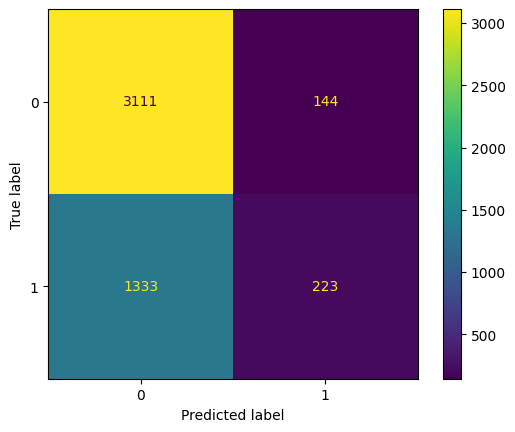

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, tree.predict(X_test));

## Modelo `LogisticRegression`

O `StandardScaler` é uma maneira de normalizar os dados (criar uma "escala padrão"). A regressão logística é suscetível à escala, então esse passo é importante.

Vamos usar o pipeline disponibilizado pela sklearn (nos cursos anteriores, utilizamos a pipeline da imblearn).

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [13]:
lr_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)

lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [14]:
recall_lr = recall_score(y_test, lr_pipeline.predict(X_test))
print(f'Recall para o Logistic Regression: {recall_lr:.3f}')

Recall para o Logistic Regression: 0.253


Até o momento:

- Recall para o Decision Tree: 0.143

- Recall para o Logistic Regression: 0.253

## Grid Search

A "Busca em Grade" é um método oferecido pelo scikit-learn para facilitar a busca por hiperparâmetros adequados ao nosso modelo, sem que precisemos ir manualmente ajustando diversos valores e avaliando as métricas. No caso, passamos os hiperparâmetros que queremos analisar, junto com um intervalo de valores para cada um desses hiperparâmetros, e o grid search irá retornar a melhor combinação possível entre eles, baseado em uma métrica que informamos.

Na imagem abaixo, temos uma representação visual de uma busca em grade utilizando dois hiperparâmetros: `max_depth` e `n_estimators`

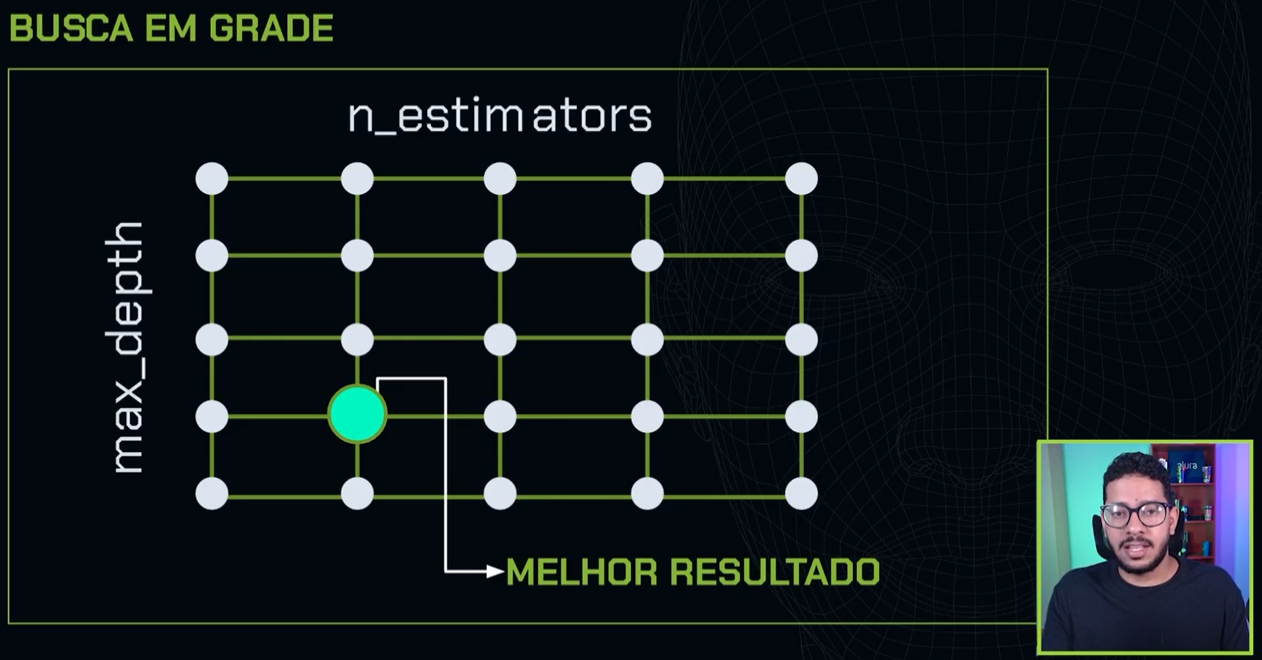

O `GridSearchCV` utiliza cross-validation (o `CV` do nome) na hora de fazer o fitting de cada combinação. Você pode informar qual método utilizar.

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(shuffle=True, random_state=42)

### Grid Search na Decision Tree

Passamos um dicionário ao Grid Search informando quais hiperparâmetros avaliar, com uma lista de valores que serão testados para cada um.

In [17]:
import numpy as np

# hyperparams and its values
tree_param_grid = {
    'criterion':  ['gini', 'entropy'],
    'max_depth': np.linspace(6, 12, 4, dtype=int), # [6, 8, 10, 12]
    'min_samples_split': np.linspace(5, 20, 4, dtype=int),
    'min_samples_leaf': np.linspace(5, 20, 4, dtype=int),
    'max_features': ['sqrt', 'log2'],
    'splitter': ['best', 'random']
}

In [18]:
tree_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=tree_param_grid,
    scoring='recall',
    cv=cv
)

tree_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 6,  8, 10, 12]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': array([ 5, 10, 15, 20]),
                         'min_samples_split': array([ 5, 10, 15, 20]),
                         'splitter': ['best', 'random']},
             scoring='recall')

O atributo `best_params_` retorna um dicionário com os melhores valores para cada hiperparâmetro informado, baseado no o scoring que pedimos para ser avaliado pelo grid search. São estes hiperparâmetros que podemos colocar em nosso modelo para chegar na melhor métrica observada.

In [19]:
tree_grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'splitter': 'best'}

Podemos ver os resultados para cada validação cruzada feita, utilizando o atributo `cv_results_`

In [20]:
tree_cv_results = pd.DataFrame(tree_grid_search.cv_results_)
tree_cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018298,0.001323,0.006889,0.000996,gini,6,sqrt,5,5,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251
1,0.007219,0.003318,0.006866,0.001501,gini,6,sqrt,5,5,random,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.193038,0.132911,0.132911,0.112342,0.161392,0.146519,0.028013,493
2,0.017026,0.002339,0.006794,0.003058,gini,6,sqrt,5,10,best,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.213608,0.145570,0.205696,0.164557,0.200949,0.186076,0.026336,251


Podemos ver a linha com os resultados da melhor configuração de parâmetros, que fica no atributo `best_index_`

In [21]:
tree_best_params = tree_cv_results.loc[[tree_grid_search.best_index_]]
tree_best_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
208,0.053115,0.01143,0.009537,0.004571,gini,12,sqrt,15,5,best,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.242089,0.324367,0.272152,0.245253,0.232595,0.263291,0.033244,1


In [22]:
print(f'Recall para o Decision Tree sem otimização: {recall_tree:.3f}')
print(f'Recall para o Decision Tree otimizado com Grid Search: {tree_best_params.mean_test_score.item():.3f}')

Recall para o Decision Tree sem otimização: 0.143
Recall para o Decision Tree otimizado com Grid Search: 0.263


Com a ajuda de gráficos de dispersão, podemos analisar como cada hiperparâmetro impacta na métrica escolhida:

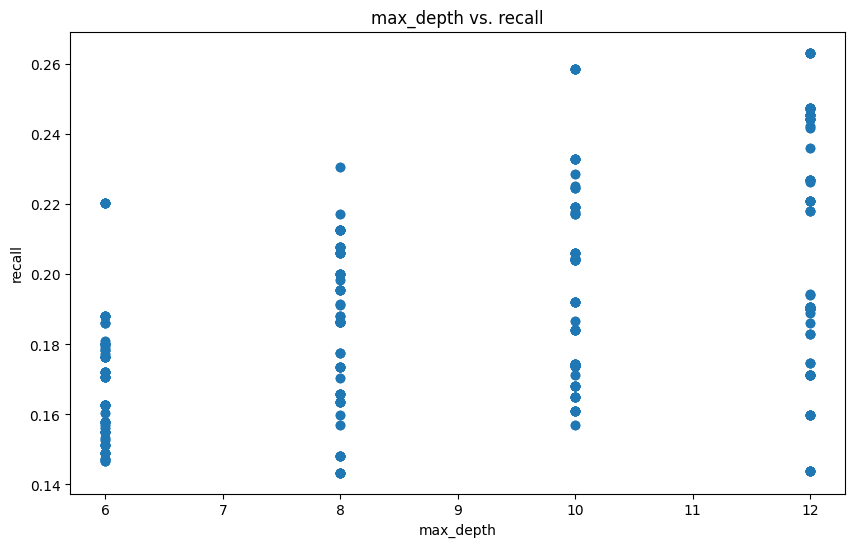

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(
    tree_cv_results['param_max_depth'],
    tree_cv_results['mean_test_score']
)
plt.title('max_depth vs. recall')
plt.xlabel('max_depth')
plt.ylabel('recall')
plt.show()

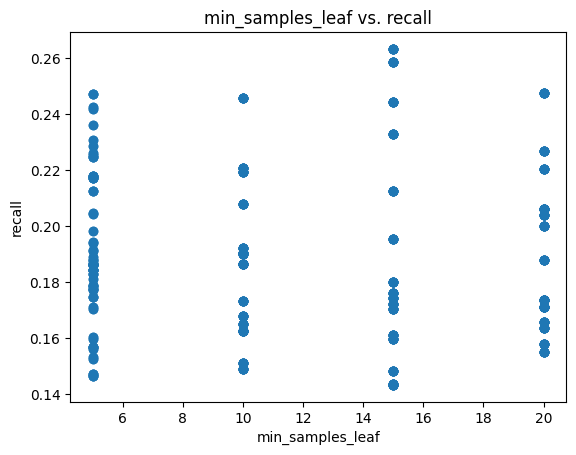

In [24]:
plt.scatter(
    tree_cv_results['param_min_samples_leaf'],
    tree_cv_results['mean_test_score']
)
plt.title('min_samples_leaf vs. recall')
plt.xlabel('min_samples_leaf')
plt.ylabel('recall')
plt.show()

### Grid Search na Logistic Regression

No LogisticRegression, há o hiperparâmetro `solver` cujo valor depende dos valores selecionados para o hiperparâmetro `penalty`. Por conta disso, o `param_grid` do `GridSearchCV` será uma lista com **dois** dicionários, utilizando os valores adequados de `solver` e `penalty`, para não correr o risco de criar combinações com valores incompatíveis entre eles.

In [25]:
max_iter = np.linspace(100, 300, 5, dtype=int)
c = [0.001, 0.01, 0.1, 1, 10]

# we will use pipeline, so we add logisticregression__ to tell the pipeline where to apply each hyperparam 
lr_param_grid = [
    # first dict for solvers newton-cg and lbfgs
    {'logisticregression__solver' : ['newton-cg', 'lbfgs'],
      'logisticregression__penalty' : ['l2'],
      'logisticregression__max_iter' : max_iter,
       'logisticregression__C' : c},
    # second dict for solver liblinear
    {'logisticregression__solver' : ['liblinear'],
      'logisticregression__penalty' : ['l1', 'l2'],
      'logisticregression__max_iter' : max_iter,
      'logisticregression__C' : c},
]

In [26]:
lr_grid_search = GridSearchCV(
    estimator=make_pipeline(
        StandardScaler(),
        LogisticRegression()
    ), 
    param_grid=lr_param_grid,
    scoring='recall',
    cv=cv
)

lr_grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid=[{'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l2'],
                          'logisticregression__solver': ['newton-cg', 'lbfgs']},
                         {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
                          'logisticregression__max_iter': array([100, 150, 200, 250, 300]),
                          'logisticregression__penalty': ['l1', 'l2'],
                          'logisticregression__solver': ['liblinear']}],
             scoring='recall')

In [27]:
lr_grid_search.best_params_

{'logisticregression__C': 0.001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}

In [28]:
lr_cv_results = pd.DataFrame(lr_grid_search.cv_results_)
lr_cv_results.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.145606,0.028096,0.019865,0.003098,0.001,100,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
1,0.032809,0.004872,0.010091,0.002581,0.001,100,l2,lbfgs,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86
2,0.106191,0.029486,0.014561,0.003186,0.001,150,l2,newton-cg,"{'logisticregression__C': 0.001, 'logisticregr...",0.102848,0.101266,0.115506,0.088608,0.079114,0.097468,0.012523,86


In [29]:
lr_best_params = lr_cv_results.loc[[lr_grid_search.best_index_]]
lr_best_params

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__penalty,param_logisticregression__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
51,0.050933,0.003291,0.018446,0.001128,0.001,100,l2,liblinear,"{'logisticregression__C': 0.001, 'logisticregr...",0.251582,0.254747,0.265823,0.248418,0.235759,0.251266,0.009723,1


In [30]:
print(f'Recall para o Logistic Regression sem otimização: {recall_lr:.3f}')
print(f'Recall para o Logistic Regression otimizado com Grid Search: {lr_best_params.mean_test_score.item():.3f}')

Recall para o Logistic Regression sem otimização: 0.253
Recall para o Logistic Regression otimizado com Grid Search: 0.251


Podemos ver que, mesmo com o Grid Search com as configurações que passamos, os parâmetros **padrões** do LogisticRegression ainda são **melhores** em termos de recall.

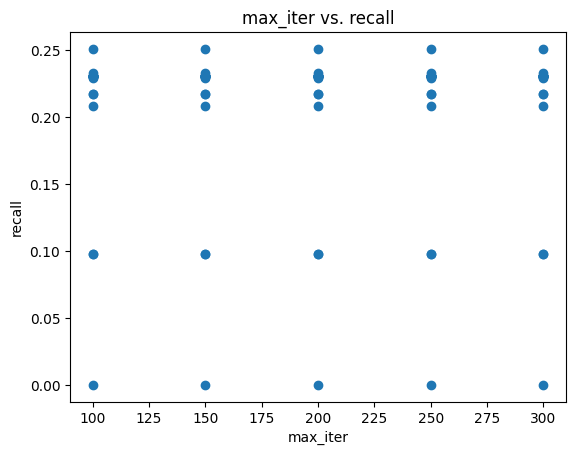

In [31]:
plt.scatter(
    lr_cv_results['param_logisticregression__max_iter'],
    lr_cv_results['mean_test_score']
)
plt.title('max_iter vs. recall')
plt.xlabel('max_iter')
plt.ylabel('recall')
plt.show()

## Validação cruzada aninhada

NCV - nested cross-validation

Quando usamos o Grid Search, passamos a ele X_train e y_train para o fitting. Esses dados são utilizado na validação cruzada interna do Grid Search enquanto busca pelos melhores valores para os hiperparâmetros. Encontrado os melhores hiperparâmetros, estamos usando novamente esse mesmo conjunto de dados para gerar o score da métrica selecionada, ou seja, deste conjunto de dados de treino, não separamos dados para teste para poder avaliar o modelo escolhido (lembrar das aulas anteriores, em que aplicávamos o train_test_split duas vezes para isso). Isso gera um score muito otimista e também há um vazamento de informações no treinamento do modelo.

A validação cruzada aninhada é uma estratégia que envolve fazer **duas validações cruzadas**: uma **interna**, usada pelo Grid Search (ou por qualquer outra estratégia de otimização de hiperparâmetro) e outra **externa**, em que, em cada divisão dos dados, disponibilizamos à validação interna somente **parte** dos dados de X_train e y_train, reservando a outra parte para teste. A validação interna vai utilizar estes dados disponibilizados pela externa, realizar sua própria validação cruzada com eles, e encontrar o melhor modelo com os hiperparâmetros otimizados (o modelo que obteve o melhor score médio da métrica selecionada). Esses hiperparâmetros otimizados são passados para a validação externa, que então os utiliza para treinar um modelo com os dados separados para treino e avaliá-lo com os dados separados para teste (o que evita o vazamento dos dados, pois a validação interna não teve acesso a esses dados), calculando também o score da métrica selecionada. Dos resultados obtidos na validação cruzada externa, escolhemos o modelo que obteve o melhor score da métrica, e o score final é a média dessa métricas (o que gera um score mais realista).

A imagem abaixo exemplifica a validação cruzada aninhada, mostrando a validação cruzada externa e, para uma das partes dessa validação, mostra a validação cruzada interna.

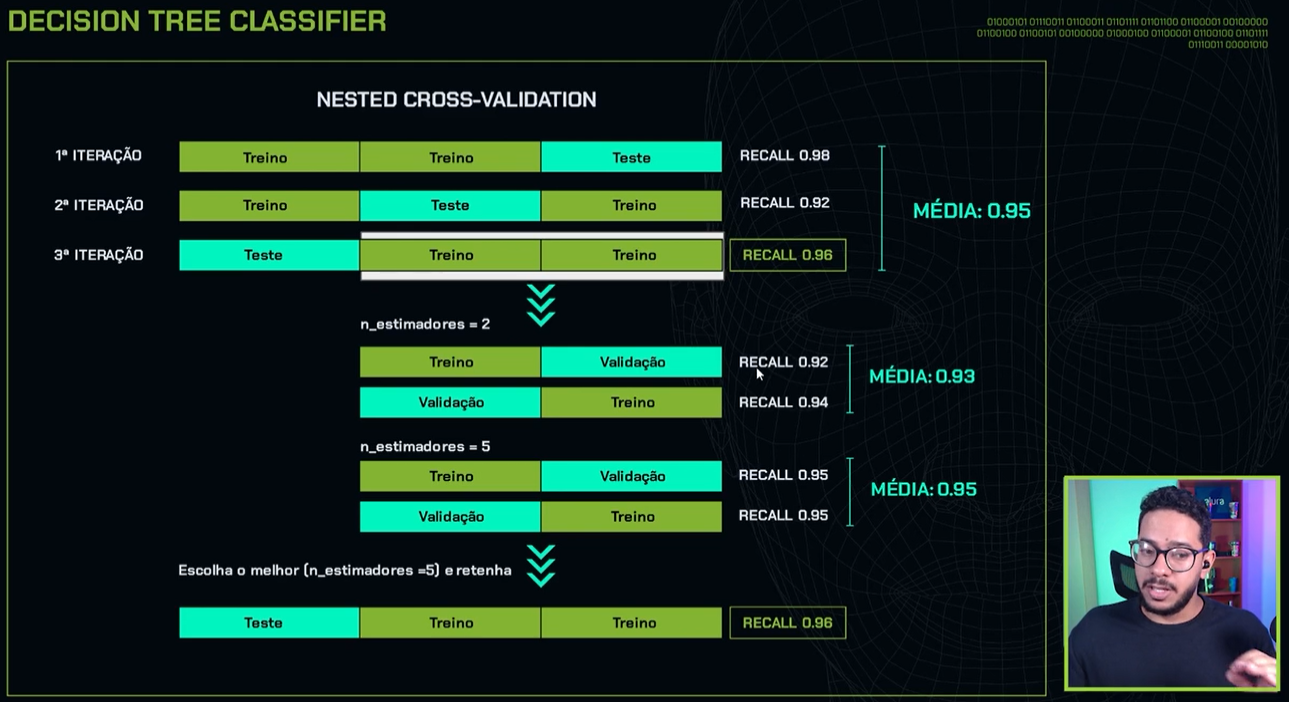

### Validação cruzada aninhada com o Decision Tree

In [32]:
# for evaluating the best optimized model
outer_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# for parameter tuning with grid search
inner_cv = StratifiedKFold(shuffle=True, random_state=42)

In [33]:
nested_grid_search_tree = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=tree_param_grid,
    scoring='recall',
    cv=inner_cv
)

Para a validação cruzada externa, utilizaremos a função `cross_val_score`, que realiza a validação cruzada e retorna uma lista de scores obtidos. Observe que, no parâmetro `estimator`, iremos passar o grid search que fará a validação cruzada interna (neste caso, o `nested_grid_search_tree`). O `cross_val_score` também possui um parâmetro `scoring`, que irá utilizar o mesmo definido para `nested_grid_search_tree` caso não seja atribuído nenhum valor a esse parâmetro, que é o que faremos a seguir:

In [34]:
from sklearn.model_selection import cross_val_score

nested_scores_tree = cross_val_score(
    estimator=nested_grid_search_tree,
    X=X_train,
    y=y_train,
    cv=outer_cv
)

In [35]:
print(f'Resultados da validação cruzada aninhada: {nested_scores_tree}')
print(f'Média: {nested_scores_tree.mean()}')

Resultados da validação cruzada aninhada: [0.23646724 0.24762808 0.20512821]
Média: 0.2297411750289676


Resumindo:

- Recall para o Decision Tree sem otimização: 0.143

- Recall para o Decision Tree otimizado com Grid Search: 0.263

- Resultados da validação cruzada externa: [0.23646724 0.24762808 0.20512821]

- **Média: 0.2297411750289676**

### Validação cruzada aninhada com o Logistic Regression

In [36]:
nested_grid_search_lr = GridSearchCV(
    estimator=make_pipeline(
        StandardScaler(),
        LogisticRegression()
    ), 
    param_grid=lr_param_grid,
    scoring='recall',
    cv=inner_cv
)

nested_scores_lr = cross_val_score(nested_grid_search_lr, X_train, y_train, cv=outer_cv)

In [37]:
print(f'Resultados da validação cruzada aninhada: {nested_scores_lr}')
print(f'Média: {nested_scores_lr.mean()}')

Resultados da validação cruzada aninhada: [0.24691358 0.27703985 0.2374169 ]
Média: 0.2537901108426093


In [38]:
nested_grid_search_lr.fit(X_train, y_train)
print(f'Melhores hiperparâmetros: {nested_grid_search_lr.best_params_}')

Melhores hiperparâmetros: {'logisticregression__C': 0.001, 'logisticregression__max_iter': 100, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'liblinear'}


Resumindo:

- Recall para o Logistic Regression sem otimização: 0.253

- Recall para o Logistic Regression otimizado com Grid Search: 0.251

- Resultados da validação cruzada aninhada: [0.24691358 0.27703985 0.2374169 ]

- Média: 0.2537901108426093

## Busca Aleatória

Ou Randomized Search CV.

Ao invés de fazer uma busca exaustiva, escolhe valores aleatórios para os hiperparâmetros e intervalo de valores passados. A quantidade de iterações com valores aleatórios é feita com o parâmetro `n_iter`.

Da documentação: If all parameters are presented as a list, sampling **without** replacement is performed. Ou seja, na escolha aleatória, garante que não irá escolher a mesma combinação de parâmetros mais de uma vez.

### Busca aleatória na Decision Tree usando NCV

In [39]:
from sklearn.model_selection import RandomizedSearchCV

nested_rs_tree = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=tree_param_grid,
    n_iter=100, # GridSearch uses 512 combinations
    scoring='recall',
    cv=inner_cv,
    random_state=42
)

nested_rs_scores_tree = cross_val_score(nested_rs_tree, X_train, y_train, cv=outer_cv)

In [40]:
print('Randomized Search:')
print(f'Resultados da validação cruzada aninhada: {nested_rs_scores_tree}')
print(f'Média: {nested_rs_scores_tree.mean()}')

Randomized Search:
Resultados da validação cruzada aninhada: [0.23646724 0.18975332 0.21272555]
Média: 0.21298203440307595


In [41]:
nested_rs_tree.fit(X_train, y_train)
nested_rs_tree.best_params_

{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}

Observe que os parâmetros são os mesmos encontrados utilizando o GridSearchCV, porém, **o tempo de execução foi bem menor** (de mais de 1 minuto para menos de 10s). 

A busca aleatória nem sempre retornará os melhores parâmetros, mas seu tempo de execução é menor. É um trade-off a ser analisado por você de acordo com o seu problema, tamanho de dataset e recursos computacionais disponíveis.

Artigo comparando grid search e randomized search (demonstram que random search é mais eficiente na otimização de hiperparâmetros): https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf

### Busca aleatória no Logistic Regression usando NCV

In [42]:
nested_rs_lr = RandomizedSearchCV(
    estimator=make_pipeline(StandardScaler(), LogisticRegression()),
    param_distributions=lr_param_grid,
    n_iter=50, # GridSearch uses 100 combinations
    scoring='recall',
    cv=inner_cv,
    random_state=42
)

nested_rs_scores_lr = cross_val_score(nested_rs_lr, X_train, y_train, cv=outer_cv)

print('Randomized Search:')
print(f'Resultados da validação cruzada aninhada: {nested_rs_scores_lr}')
print(f'Média: {nested_rs_scores_lr.mean()}')

Randomized Search:
Resultados da validação cruzada aninhada: [0.24691358 0.27703985 0.2374169 ]
Média: 0.2537901108426093


In [43]:
nested_rs_lr.fit(X_train, y_train)
nested_rs_lr.best_params_

{'logisticregression__solver': 'liblinear',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 150,
 'logisticregression__C': 0.001}

Os resultados da média da métrica foram iguais, mas o valor de max_iter foi diferente (100 no grid search, 150 no randomized search). Se olharmos para o gráfico "max_iter vs. recall" produzido anteriormente, poderemos notar que essa diferença era esperada, visto que o valor de 100 e 150 para max_iter exibiu valores de recall semelhantes. 

## Otimização bayesiana

É outra forma de buscar a melhor combinação de valores para os hiperparâmetros, utilizando conceitos do teorema de Bayes. No entanto, a teoria foi explicada somente em um texto pequeno e confuso, e parece ser um conceito bem complexo, envolvendo otimização de uma função de maneira iterativa e evolutiva (o modelo treina, recebe um novo input e retreina baseado nessa nova entrada, de maneira a maximizar ou minimizar alguma coisa). Sua aplicação, no entanto, segue passos semelhantes às das estratégias anteriores (e roda muito mais devagar, provavelmente porque o número de combinações é muito pequena para ver essa estratégia ganhando mais tempo em relação às outras). A vantagem dessa otimização é melhor vista quando seu espaço de busca (a quantidade de combinações de hiperparâmetros) é muito grande, pois a busca é mais assertiva e não exaustiva.

Da documentação: "In contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. The number of parameter settings that are tried is given by `n_iter`."

Um artigo nas referências do curso explicou melhor o funcionamento (mas talvez eu ainda não esteja entendendo corretamente): https://towardsdatascience.com/bayesian-optimization-concept-explained-in-layman-terms-1d2bcdeaf12f. 

- O objetivo da otimização é maximizar/minimizar uma função objetivo, função essa que representa a métrica que você está considerando. No caso do curso, o objetivo é maximizar o recall, então essa é nossa função objetivo. Baseado em escolhas iniciais para os hiperparâmetros, obtemos alguns pontos dessa função objetivo e a otimização bayesiana cria um "surrorgate model" que se aproxima dessa função objetivo. É criada uma chamada "função de aquisição", baseada no surrorgate model; por meio dessa função é escolhido o próximo valor do hiperparâmetro, onde a função de aquisição é maximizada (ou minimizada, dependendo de qual função de aquisição é aplicada). Escolhido o hiperparâmetro, o surrorgate model é retreinado, de modo a se aproximar da função objetivo. Esses passos são repetidos n_iter vezes.

Iremos utilizar outra biblioteca para aplicar a otimização bayesiana: `scikit-optimize`.

### Otimização bayesiana para a Decision Tree

Vamos utilizar as estruturas de dados da scikit-optimize para aplicar ao dicionário com os hiperparâmetros a serem avaliados.

In [44]:
from skopt.space import Integer, Categorical

space_tree = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(6, 12), # sample an integer between 6 and 12
    'min_samples_split': Integer(5, 20),
    'min_samples_leaf': Integer(5, 20),
    'max_features': Categorical(['sqrt', 'log2']),
    'splitter': Categorical(['best', 'random'])
}


In [45]:
from skopt import BayesSearchCV

nested_bayes_tree = BayesSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    search_spaces=space_tree,
    n_iter=50, # number of parameter combinations to sample
    scoring='recall',
    cv=inner_cv,
    random_state=42
)

In [46]:
nested_bayes_scores_tree = cross_val_score(nested_bayes_tree, X_train, y_train, cv=outer_cv)

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warni

Os warnings são somente avisos que a função ignorou combinações de parâmetros já testadas anteriormente. Talvez o n_iter está muito grande?

In [47]:
print('Otimização Bayesiana:')
print(f'Resultados da validação cruzada aninhada: {nested_bayes_scores_tree}')
print(f'Média: {nested_bayes_scores_tree.mean()}')

Otimização Bayesiana:
Resultados da validação cruzada aninhada: [0.23931624 0.22011385 0.20512821]
Média: 0.22151943214561812


In [48]:
nested_bayes_tree.fit(X_train, y_train)
nested_bayes_tree.best_params_

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


OrderedDict([('criterion', 'gini'),
             ('max_depth', 12),
             ('max_features', 'log2'),
             ('min_samples_leaf', 15),
             ('min_samples_split', 15),
             ('splitter', 'best')])

### Otimização bayesiana para a regressão logística

In [54]:
max_iter = Integer(100, 300)
c = Categorical([0.001, 0.01, 0.1, 1, 10])

space_lr = [
    {
        'logisticregression__solver': Categorical(['newton-cg', 'lbfgs']),
        'logisticregression__penalty': Categorical(['l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
    {
        'logisticregression__solver': Categorical(['liblinear']),
        'logisticregression__penalty': Categorical(['l1', 'l2']),
        'logisticregression__max_iter': max_iter,
        'logisticregression__C': c
    },
]

In [ ]:
nested_bayes_lr = BayesSearchCV(
    estimator=make_pipeline(StandardScaler(), LogisticRegression()),
    search_spaces=space_lr,
    # n_iter=50, # 50 is already the default value
    scoring='recall',
    cv=inner_cv,
    random_state=42
)

**Atenção:** o cross_val_score abaixo vai demorar bastante (cerca de 15 minutos). Comente esta célula e a seguinte se quiser pular.

In [55]:
nested_bayes_scores_lr = cross_val_score(nested_bayes_lr, X_train, y_train, cv=outer_cv)

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warni

In [56]:
print('Otimização Bayesiana:')
print(f'Resultados da validação cruzada aninhada: {nested_bayes_scores_lr}')
print(f'Média: {nested_bayes_scores_lr.mean()}')

Otimização Bayesiana:
Resultados da validação cruzada aninhada: [0.24691358 0.27703985 0.2374169 ]
Média: 0.2537901108426093


In [57]:
nested_bayes_lr.fit(X_train, y_train)
nested_bayes_lr.best_params_

c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
c:\codes\ML-classificacao-Alura\venv\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warni

OrderedDict([('logisticregression__C', 0.001),
             ('logisticregression__max_iter', 150),
             ('logisticregression__penalty', 'l2'),
             ('logisticregression__solver', 'liblinear')])

In [58]:
nested_bayes_lr.predict(X_test)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

## Resultados Decision Tree

**Grid Search:**

Resultados da validação cruzada aninhada: [0.23646724 0.24762808 0.20512821]

Média: 0.2297411750289676

```python
{'criterion': 'gini',
 'max_depth': 12,
 'max_features': 'sqrt',
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'splitter': 'best'}
 ```


**Busca aleatória:**

Resultados da validação cruzada aninhada: [0.23646724 0.18975332 0.21272555]

Média: 0.21298203440307595

```python
{'splitter': 'best',
 'min_samples_split': 5,
 'min_samples_leaf': 15,
 'max_features': 'sqrt',
 'max_depth': 12,
 'criterion': 'gini'}
```

**Otimização Bayesiana:**

Resultados da validação cruzada aninhada: [0.23931624 0.22011385 0.20512821]

Média: 0.22151943214561812

```python
OrderedDict([('criterion', 'gini'),
             ('max_depth', 12),
             ('max_features', 'log2'),
             ('min_samples_leaf', 15),
             ('min_samples_split', 15),
             ('splitter', 'best')])
```            

## Resultados Logistic Regression

**Grid Search:**

Resultados da validação cruzada aninhada: [0.24691358 0.27703985 0.2374169 ]

Média: 0.2537901108426093

Melhores hiperparâmetros: 

```python
{'logisticregression__C': 0.001,
 'logisticregression__max_iter': 100,
 'logisticregression__penalty': 'l2',
 'logisticregression__solver': 'liblinear'}
```

**Randomized Search:**

Resultados da validação cruzada aninhada: [0.24691358 0.27703985 0.2374169 ]

Média: 0.2537901108426093

```python
{'logisticregression__solver': 'liblinear',
 'logisticregression__penalty': 'l2',
 'logisticregression__max_iter': 150,
 'logisticregression__C': 0.001}
```

**Otimização Bayesiana:**

Resultados da validação cruzada aninhada: [0.24691358 0.27703985 0.2374169 ]

Média: 0.2537901108426093

```python
OrderedDict([('logisticregression__C', 0.001),
             ('logisticregression__max_iter', 150),
             ('logisticregression__penalty', 'l2'),
             ('logisticregression__solver', 'liblinear')])
```             

## Conclusão: melhor modelo

A média do recall nas três estratégias de otimização para o **modelo de Regressão Logística** foi maior do que o encontrado para a Árvore de decisão. O valor da média nessas três estratégias foi o mesmo, 0.2537901108426093, com a única diferença entre os melhores hiperparâmetros sendo o max_iter, que foi 100 na Grid Search, e 150 na Busca Aleatória e na Otimização Bayesiana.

Vamos optar por usar o modelo de Regressão Logística treinado com a Otimização Bayesiana para o teste final: verificar como o modelo se sai com os dados de teste:


In [59]:
recall_score(y_test, nested_bayes_lr.predict(X_test))

0.269280205655527

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, nested_bayes_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.72      0.90      0.80      3255
           1       0.57      0.27      0.37      1556

    accuracy                           0.70      4811
   macro avg       0.64      0.59      0.58      4811
weighted avg       0.67      0.70      0.66      4811



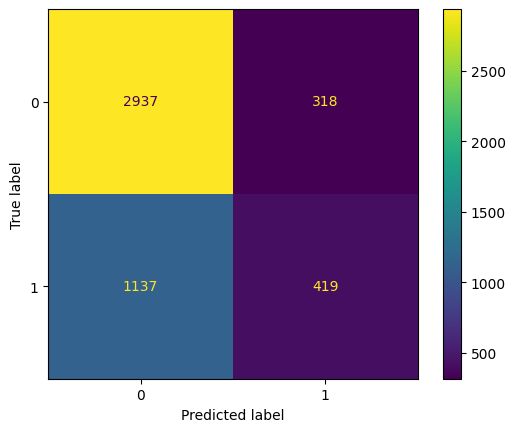

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, nested_bayes_lr.predict(X_test));

## Qual estratégia de otimização escolher?

Depende do seu problema e da quantidade de hiperparâmetros e combinações a serem avaliadas (denominado espaço de busca). Levando em conta somente o espaço de busca e tempo computacional, uma orientação é:

- Se o espaço de busca é pequeno, o Grid Search irá performar bem; 

- Se o espaço de busca é grande, a Busca Aleatória e a Otimização Bayesiana são mais interessantes; 

- Se o espaço de busca é muito grande, a Otimização Bayesiana terá uma performance melhor, pois não é uma busca exaustiva.